<a href="https://colab.research.google.com/github/u5633772/u5633772-DataScience-GenAI-Submissions/blob/main/6_01_logistic_regression_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.01 Logistic Regression in PyTorch
This tutorial will first show you setting up a logistic regression, with a dataset we have used previously, in PyTorch. The aim is to give you a feel for how PyTorch works.

We'll start with the stuff you've previously seen:

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# Transform the test data using the *same* fitted scaler
X_test = scaler.transform(X_test)

#Print and double check scaling has taken place
print("First 5 rows of X_train_scaled:")
print(X_train[:5])

First 5 rows of X_train_scaled:
[[0.06552721 0.25769361 0.07732252 0.03436883 0.48722578 0.41750565
  0.73336457 0.21744533 0.50400427 0.64237574 0.07818215 0.18427334
  0.05314988 0.02029892 0.26637658 0.62943491 0.76717172 0.62928585
  0.63623129 0.29933115 0.05964476 0.28331557 0.05597072 0.02508436
  0.523195   0.44938009 1.         0.60137457 0.52493594 0.52950153]
 [0.65620256 0.57017247 0.67420686 0.48940187 0.55493365 0.90343127
  0.58270853 0.74353877 0.65563267 0.50589722 0.18768785 0.08899841
  0.17231306 0.13944393 0.08634463 0.34050831 0.09777778 0.29683652
  0.18847288 0.1520183  0.65791974 0.57196162 0.62025316 0.46283247
  0.52930789 0.80287939 0.54153355 0.9975945  0.49931007 0.62190573]
 [0.07257946 0.14034494 0.08023901 0.0388312  0.22190124 0.23330594
  0.14029991 0.1083499  0.62680192 0.4142797  0.108021   0.42096888
  0.0872167  0.03122537 0.23880749 0.2788476  0.10888889 0.29551051
  0.63529807 0.17022512 0.04868065 0.19216418 0.05642824 0.02146189
  0.18467704 0

Notes:

Scale the train data using a standard scaler/minmax scaler . Not all columns need to be standardised as some data is discrete (e.g. 'defaults on file') but selective scaling wasn't used as this can lead to inconsistent regularization penalties across different feature types.A Standard scaler was used instead, to avoid complexity and inconsistency in scaling.

Always double check data has been checked:
The data is seen to be scaled as the numberic values have changed to postive and negatives centred around 0 ( +-standard deviations from mean). Data leakage is also prevented as the scaler is only fit to X_train and the X_test is transformed with the same scaler as train.

The above code takes the sklearn breast_cancer dataset, splits into train and test and then finally scales the data. Now we just need to convert this data into PyTorch's required datatype _tensors_ (see 6\_X if you want to understand more about tensors).

In [11]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Print an example
print(X_train[:5])

tensor([[0.0655, 0.2577, 0.0773, 0.0344, 0.4872, 0.4175, 0.7334, 0.2174, 0.5040,
         0.6424, 0.0782, 0.1843, 0.0531, 0.0203, 0.2664, 0.6294, 0.7672, 0.6293,
         0.6362, 0.2993, 0.0596, 0.2833, 0.0560, 0.0251, 0.5232, 0.4494, 1.0000,
         0.6014, 0.5249, 0.5295],
        [0.6562, 0.5702, 0.6742, 0.4894, 0.5549, 0.9034, 0.5827, 0.7435, 0.6556,
         0.5059, 0.1877, 0.0890, 0.1723, 0.1394, 0.0863, 0.3405, 0.0978, 0.2968,
         0.1885, 0.1520, 0.6579, 0.5720, 0.6203, 0.4628, 0.5293, 0.8029, 0.5415,
         0.9976, 0.4993, 0.6219],
        [0.0726, 0.1403, 0.0802, 0.0388, 0.2219, 0.2333, 0.1403, 0.1083, 0.6268,
         0.4143, 0.1080, 0.4210, 0.0872, 0.0312, 0.2388, 0.2788, 0.1089, 0.2955,
         0.6353, 0.1702, 0.0487, 0.1922, 0.0564, 0.0215, 0.1847, 0.1543, 0.1116,
         0.1748, 0.3385, 0.2531],
        [0.1449, 0.5245, 0.1429, 0.0758, 0.3967, 0.1814, 0.0557, 0.0803, 0.3897,
         0.2807, 0.0500, 0.2504, 0.0349, 0.0184, 0.1862, 0.0608, 0.0273, 0.1183,
       

This code is performing the following actions:

Conversion from NumPy to PyTorch: It takes the X_train, X_test, y_train, and y_test variables, which were previously NumPy arrays, and converts them into PyTorch torch.Tensor objects.

Data Type Specification: dtype=torch.float32 explicitly sets the data type for the tensors to 32-bit floating-point numbers. This is a common practice in deep learning to maintain precision while optimizing memory and computation.



Adding a Dimension (.unsqueeze(1)): For y_train and y_test, the .unsqueeze(1) method is called. This adds an extra dimension of size 1 at position 1 (the second dimension). This is often done to reshape the target labels y from a 1D array (e.g., [batch_size]) to a 2D column vector (e.g., [batch_size, 1]), which is a common requirement for PyTorch's loss functions, especially when dealing with binary classification outputs like in this logistic regression model.

Why?

Pytorch models will naturally produce an output tensor with a shape of [batch_size, 1] when making predictions for a batch of inputs. For example, if you pass 32 samples, the model might output (32, 1). To perform element-wise comparisons and calculations (like the BCELoss does), the target tensor (y_train or y_test) needs to have a matching shape. If y were (32,) (1D), it wouldn't directly align with the (32, 1) output of the model, leading to shape mismatch errors during loss calculation.



Now we have sorted out the data, we can specify our model. Note this is much more customisable in PyTorch, but that also means the code is more complicated:

In [12]:
# Define logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

This code defines a custom class we create called `LogisticRegression`, which inherits from PyTorch's `nn.Module` (i.e. it uses PyTorch's `nn.Module` as a template). This is the standard way to define models in PyTorch. The class encapsulates the structure and behavior of our logistic regression model.
<br><br><br>
__Step-by-step explanation:__

1. `class LogisticRegression(nn.Module)`: This line defines the class and indicates that it's a subclass of `nn.Module`.
2. `def __init__(self, input_dim)`: This is the constructor of the class (the thing that builds objects of this class). It takes the input_dim as an argument, which represents the number of features in the input data.
3. `super(LogisticRegression, self).__init__()`: This line initialises the parent class (`nn.Module`), ensuring that all necessary setup is done. I.e. if we create an object of this class, then this step builds the actual object according to our template we are defining.
4. `self.linear = nn.Linear(input_dim, 1)`: This line creates a linear layer (i.e. linear regression), which is the core component of our logistic regression model. It takes `input_dim` number of features as input and produces a single output (for binary classification).
5. `def forward(self, x)`: This method defines the forward pass of the model, which is how input data is transformed into predictions.
6. `return torch.sigmoid(self.linear(x))`: This line performs the following steps (steps 7 and 8):
7. `self.linear(x)`: Applies the linear layer to the input x.
8. `torch.sigmoid(...)`: Applies the sigmoid function to the output of the linear layer, producing a probability between 0 and 1. This probability represents the model's prediction for the given input.
<br><br>
Now we have defined the class (our model specification essentially), we can create an object of this class. As per the `def __init__(self, input_dim)` command above (step 2), when we build an object we need to specify the `input_dim` (number of features in the input).

In [13]:
# Initialize model
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)

We have built an object of the class template called _model_ much as we did with sklearn (the only difference is that sklearn had the class template already built for us so all we had to do was import it). We also need to pass a couple of hyperparameters - the loss function (BCE is short for [binary cross entropy](https://docs.pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)) and the optimiser we want to use (SGD is short for [stochastic gradient descent](https://docs.pytorch.org/docs/stable/generated/torch.optim.SGD.html)). If interested in how these work in PyTorch (you don't have to be), follow the links for a technical explanation.

In [14]:
# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

With everything setup, we can begin training! Again this is a more manual process in PyTorch, but is still fundamentally the same:

In [15]:
# Training loop
epochs = 1000 # specify 1000 epochs (full passes through the data)

for epoch in range(epochs):
    model.train() # put the model object in train mode
    optimizer.zero_grad() # reset the gradient (next week)
    outputs = model(X_train) # pass the X_train data

    # calculate loss as the comparison between predictions (y_hat) and
    # real values (y) according to our loss function (criterion)
    loss = criterion(outputs, y_train)
    loss.backward() # backpropogate loss (next week)
    optimizer.step() # update the parameters based on this round of training

    # every 10 steps we will print out the current loss
    if (epoch+1) % 10 == 0: # modular arithmetic
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {round(loss.item(), 4)}')

Epoch [10/1000], Loss: 0.714
Epoch [20/1000], Loss: 0.7109
Epoch [30/1000], Loss: 0.708
Epoch [40/1000], Loss: 0.705
Epoch [50/1000], Loss: 0.7021
Epoch [60/1000], Loss: 0.6992
Epoch [70/1000], Loss: 0.6963
Epoch [80/1000], Loss: 0.6935
Epoch [90/1000], Loss: 0.6906
Epoch [100/1000], Loss: 0.6878
Epoch [110/1000], Loss: 0.685
Epoch [120/1000], Loss: 0.6823
Epoch [130/1000], Loss: 0.6796
Epoch [140/1000], Loss: 0.6768
Epoch [150/1000], Loss: 0.6742
Epoch [160/1000], Loss: 0.6715
Epoch [170/1000], Loss: 0.6689
Epoch [180/1000], Loss: 0.6662
Epoch [190/1000], Loss: 0.6637
Epoch [200/1000], Loss: 0.6611
Epoch [210/1000], Loss: 0.6585
Epoch [220/1000], Loss: 0.656
Epoch [230/1000], Loss: 0.6535
Epoch [240/1000], Loss: 0.651
Epoch [250/1000], Loss: 0.6486
Epoch [260/1000], Loss: 0.6461
Epoch [270/1000], Loss: 0.6437
Epoch [280/1000], Loss: 0.6413
Epoch [290/1000], Loss: 0.6389
Epoch [300/1000], Loss: 0.6366
Epoch [310/1000], Loss: 0.6342
Epoch [320/1000], Loss: 0.6319
Epoch [330/1000], Loss:

We can see that loss decreasing each time we print, which is what we would expect! But how does the module perform on test data?

In [16]:
# Evaluation
model.eval() # switch to testing mode
with torch.no_grad(): # turn off the gradient (stop training)
    y_pred = model(X_test) # pass the X_test data

    # if the output < 0.5 then class 0 and else class 1
    y_pred = (y_pred >= 0.5).float()
    accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())
    print(f'Accuracy: {round(accuracy, 4)}')

Accuracy: 0.8947


Accuracy looks good! How about a confusion matrix?

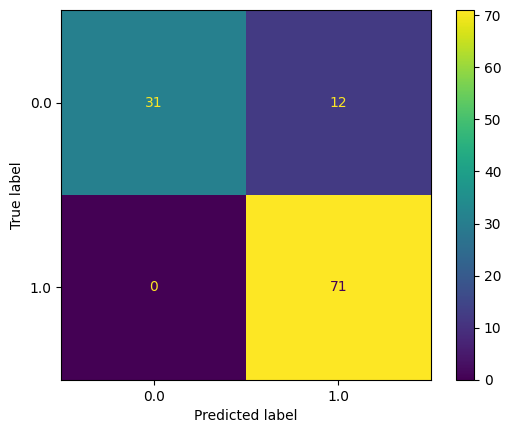

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay as CM
import numpy as np

# Convert tensors to NumPy arrays
y_test_np = y_test.numpy()
y_pred_np = y_pred.numpy()

CM.from_predictions(y_test_np, y_pred_np)

This is the same code as earlier in the module and we can see it gives us good results! (Although you should note results might vary different times you run it because of how we use random numbers in the process - don't be scared of randomness!!).

Overall we should be able to see this is a very similar process. However, unlike in sklearn, this is a much more manual process in places. This means the code is a little more hard work, but gives us much more flexibility to define the model how we want. For logistic regression we are just following the standard template of the algorithm. However, as we move on into deep learning we will see this flexibility is basically the job ... the key hyperparameters are how we define these different layers and transformations.